# XID+PACS GAMA-09 Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_GAMA09_cat.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J084010.818-014917.918,130.045073591754,-1.821643930630163,10.275918,24.073088,2.7069516,5.538744,13.214717,1.5386654,0.0010062944,0.00036446907,0.0025899494,0.0017402443,1.0000238,0.99906206,2000.0,2000.0,1.0,1.0
HELP_J084010.887-014926.515,130.045364346364,-1.824032071544403,6.676865,16.719364,1.691394,5.415179,14.514021,1.3053118,0.0010062944,0.00036446907,0.0025899494,0.0017402443,0.9994702,0.9990447,2000.0,2000.0,1.0,1.0
HELP_J084011.031-014928.056,130.045962871422,-1.824460022287783,7.2524934,17.409412,1.7849734,12.669696,27.385946,4.007434,0.0010062944,0.00036446907,0.0025899494,0.0017402443,0.99872184,0.9992431,2000.0,2000.0,1.0,1.0
HELP_J084012.339-014917.775,130.051412969849,-1.821604146407573,51.92741,72.61022,30.69428,19.106487,34.419655,6.690286,0.0010062944,0.00036446907,0.0025899494,0.0017402443,1.0064857,0.99835885,1221.0,2000.0,1.0,1.0
HELP_J084013.846-014841.302,130.05769199847,-1.811472810596263,15.3898945,31.062845,4.8046646,5.7299933,13.944969,1.4411653,0.0010062944,0.00036446907,0.0025899494,0.0017402443,1.0002383,0.99848574,2000.0,2000.0,1.0,1.0
HELP_J084014.169-014858.371,130.059036452828,-1.816214293107473,14.309193,30.51642,4.5450616,18.596914,34.35812,6.192915,0.0010062944,0.00036446907,0.0025899494,0.0017402443,1.0000792,1.0002693,2000.0,2000.0,1.0,1.0
HELP_J084014.705-014930.818,130.061271280055,-1.8252271509358031,15.088003,30.086046,4.191089,8.625801,19.375345,2.4013424,0.0010062944,0.00036446907,0.0025899494,0.0017402443,0.99918133,0.99937606,2000.0,2000.0,1.0,1.0
HELP_J084015.056-014950.849,130.06273337588598,-1.830791362858903,11.567237,24.931627,3.4698431,10.311219,21.941086,2.8660188,0.0010062944,0.00036446907,0.0025899494,0.0017402443,1.000161,0.99895155,2000.0,2000.0,1.0,1.0


In [4]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


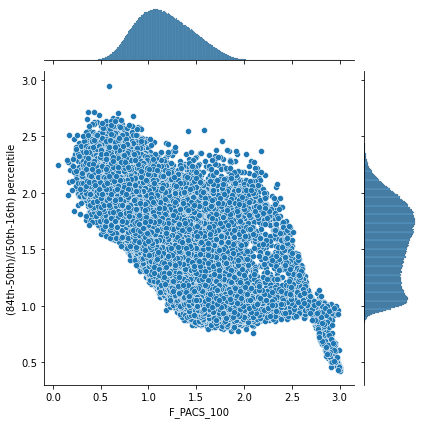

In [5]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use], kind='scatter')

g.savefig('../../data/figs/sk_PACS100_GAMA-09.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_GAMA-09.pdf', bbox='tight')

In [8]:
10**1.3

19.952623149688797

For 100 $\mathrm{\mu m}$ depth is ~ 20mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


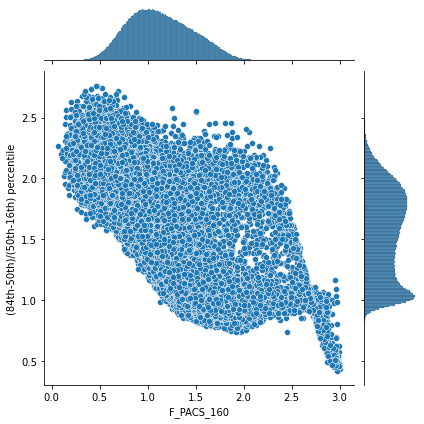

In [6]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='scatter')

g.savefig('../../data/figs/sk_PACS160_GAMA-09.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_GAMA-09.pdf', bbox='tight')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [10]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [11]:
ind_100=(cat['F_PACS_100'] < 20)
ind_160=(cat['F_PACS_160'] < 30) 


In [12]:
print(ind_100.sum(),ind_160.sum(),len(cat))

897306 1095180 1322112


In [13]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [14]:
cat.write('./data/dmu26_XID+PACS_GAMA-09_cat_20190918.fits', format='fits',overwrite=True)
